In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
import tejapi
tejapi.ApiConfig.api_key = 'your key'
tejapi.ApiConfig.ignoretz=True

In [3]:
data = tejapi.get('TWN/EWPRCD',
                  coid='2454',
                  paginate = True,
                  chinese_column_name = True
                 )
return_ = tejapi.get('TWN/EWPRCD2',
                  coid='2454',
                  paginate = True,
                  chinese_column_name = True
                 )
data['報酬率％'] = return_['日報酬率(%)']

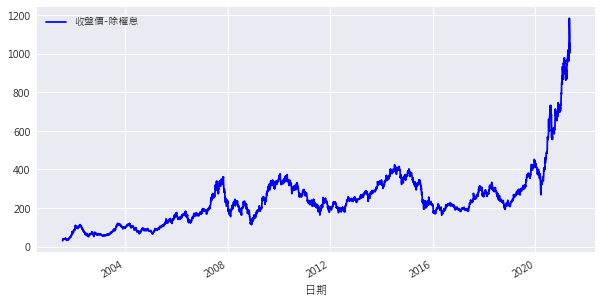

In [4]:
data.plot(x = '日期',
          y = '收盤價-除權息',
          color = 'blue',
          figsize=(10,5))
plt.legend()
plt.savefig('stock_price.png')

In [5]:
data.columns

Index(['證券碼', '日期', '開盤價', '最高價', '最低價', '收盤價', '成交量(千股)', '流通股數(千股)',
       '交易所本益比', '交易所淨值市價比', '現金股利率', '開盤價-除權息', '最高價-除權息', '最低價-除權息',
       '收盤價-除權息', '報酬率％'],
      dtype='object')

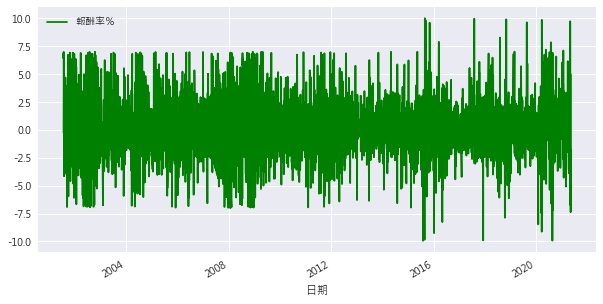

In [6]:
data.plot(x = '日期',
          y = '報酬率％',
          color = 'green',
          figsize=(10,5))
plt.legend()
plt.savefig('return.png')

## 線性回歸

In [7]:
# 用昨天(第t-1日)的報酬率去預測今天(第t日)的報酬率
# 因前兩個位置的值為NA，故取第3個位置以後的數值
x = data['報酬率％'].shift(1)[2:].values
y = data['報酬率％'][2:].values

In [8]:
reg = np.polyfit(x,y,deg=1)
reg

array([0.04177747, 0.09371852])

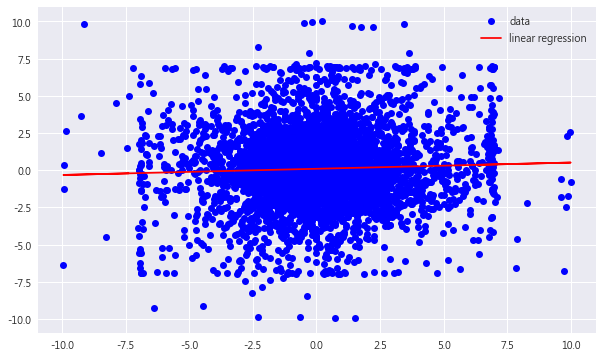

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg,x),'r',label='linear regression')
plt.legend(loc=0)
plt.savefig('lm.png')

In [10]:
import statsmodels.api as sm
X2 = sm.add_constant(x) #為模型增加常數項，即迴歸線在y軸上的截距
est = sm.OLS(y, X2)
est2 = est.fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.542
Date:                Fri, 07 May 2021   Prob (F-statistic):            0.00349
Time:                        10:46:00   Log-Likelihood:                -11346.
No. Observations:                4885   AIC:                         2.270e+04
Df Residuals:                    4883   BIC:                         2.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.035      2.651      0.0

## 剛剛僅考慮了落後一期(t-1)的報酬率，這次增加至落後三期(t-2, t-3)
## 迴歸式：
$R_{t}\ = R_{t-1}+ R_{t-2}+ R_{t-3}+ e$



In [11]:
data['R_t-1'] = data['報酬率％'].shift(1)
data['R_t-2'] = data['報酬率％'].shift(2)
data['R_t-3'] = data['報酬率％'].shift(3)

In [12]:
data

,證券碼,日期,開盤價,最高價,最低價,收盤價,成交量(千股),流通股數(千股),交易所本益比,交易所淨值市價比,現金股利率,開盤價-除權息,最高價-除權息,最低價-除權息,收盤價-除權息,報酬率％,R_t-1,R_t-2,R_t-3
None,,,,,,,,,,,,,,,,,,,
0,2454,2001-07-23,297.0,297.0,297.0,297.0,113.000,216866,0.00,NaN,NaN,29.9768,29.9768,29.9768,29.9768,6.8345,NaN,NaN,NaN
1,2454,2001-07-24,314.0,317.0,308.0,316.0,14468.937,216866,20.60,NaN,NaN,31.6926,31.9954,31.0871,31.8945,6.3973,6.8345,NaN,NaN
2,2454,2001-07-25,316.0,338.0,316.0,338.0,5706.246,216866,22.03,NaN,NaN,31.8945,34.1150,31.8945,34.1150,6.9620,6.3973,6.8345,NaN
3,2454,2001-07-26,350.0,361.0,347.0,361.0,3902.035,216866,23.53,NaN,NaN,35.3262,36.4365,35.0234,36.4365,6.8047,6.9620,6.3973,6.8345
4,2454,2001-07-27,370.0,376.0,358.0,360.0,3680.150,216866,23.47,NaN,NaN,37.3448,37.9504,36.1337,36.3355,-0.2770,6.8047,6.9620,6.3973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,2454,2021-04-29,1185.0,1185.0,1185.0,1185.0,6567.928,1590178,45.82,5.04,3.1228,1185.0000,1185.0000,1185.0000,1185.0000,9.7222,1.4085,-0.4673,3.3816
4883,2454,2021-05-03,1175.0,1175.0,1080.0,1105.0,26691.326,1590178,42.73,4.70,3.3489,1175.0000,1175.0000,1080.0000,1105.0000,-6.7511,9.7222,1.4085,-0.4673
4884,2454,2021-05-04,1100.0,1105.0,1025.0,1085.0,18231.506,1590178,41.96,4.62,3.4106,1100.0000,1105.0000,1025.0000,1085.0000,-1.8100,-6.7511,9.7222,1.4085


In [13]:
x = data[['R_t-1','R_t-2','R_t-3']][4:].values
y = data['報酬率％'][4:].values

In [14]:
reg_t3 = np.linalg.lstsq(x,y, rcond=None)[0]
reg_t3

array([ 0.04033355,  0.01193311, -0.03801351])

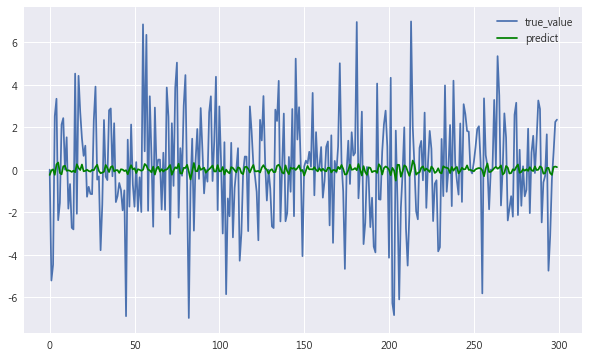

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y[1000:1300],label = 'true_value')
#plt.plot((x*reg_t3).sum(axis=1)[1000:1300],label = 'predict')
plt.plot(np.dot(x, reg_t3)[1000:1300],color = 'green',label = 'predict')
plt.legend()
plt.savefig('lm_lag3_pred.png')

In [16]:
import statsmodels.api as sm
X3 = sm.add_constant(x) #為模型增加常數項，即迴歸線在y軸上的截距
est = sm.OLS(y, X3)
est2 = est.fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.140
Date:                Fri, 07 May 2021   Prob (F-statistic):            0.00151
Time:                        10:46:00   Log-Likelihood:                -11331.
No. Observations:                4883   AIC:                         2.267e+04
Df Residuals:                    4879   BIC:                         2.270e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0942      0.035      2.666      0.0

## 羅吉斯回歸

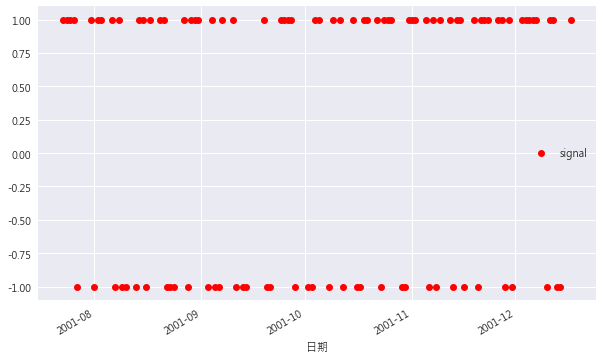

In [18]:
data['signal'] = np.where(data['報酬率％']>0,1,-1)
# 繪圖
data[:100].plot(x = '日期',
                y = 'signal',
                style = 'ro',
                figsize = (10,6)
               )
plt.savefig('0_1.png')

In [19]:
x = data['R_t-1'][2:1000].values
y = data['signal'][2:1000].values

In [20]:
reg = np.polyfit(x, y, deg = 1)
reg

array([ 0.01192538, -0.07414905])

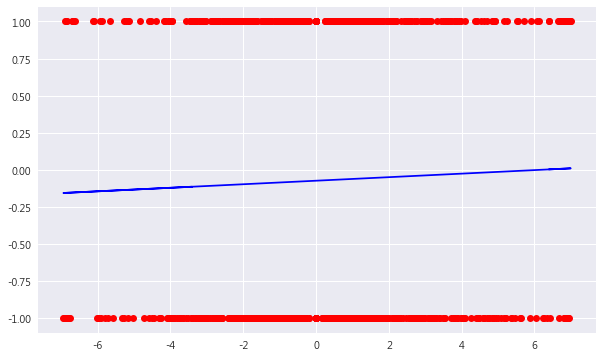

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')
plt.plot(x, np.polyval(reg, x), 'b')
plt.savefig('lm_classification.png')

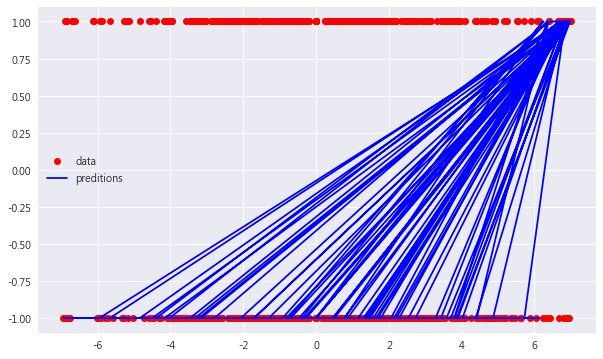

In [22]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(solver = 'lbfgs')
R_t1 = x.reshape(1,-1).T
signal = y
lm.fit(R_t1,signal)
preditions = lm.predict(R_t1)
plt.figure(figsize = (10, 6))
plt.plot(x, y, 'ro', label = 'data')
plt.plot(x, preditions, 'b', label = 'preditions')
plt.legend(loc = 0)
plt.savefig('logistic.png')

In [23]:
from sklearn.metrics import accuracy_score
preditions = lm.predict(R_t1)
accuracy_score(preditions, y)

0.5470941883767535

In [24]:
pd.DataFrame(preditions).value_counts()

-1    959
 1     39
dtype: int64